<a href="https://colab.research.google.com/github/AceVentura7/Selenium-youtube-scrapper/blob/main/global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('global-terrorism')
jovian.set_colab_id('10dLHJNxny6msRCsMiqrusH5Uh549jmfT')

# Exploratory Data Analysis : Global Terrorism

![](https://www.worldatlas.com/r/w1200-h701-c1200x701/upload/93/44/56/terrorism-worldatlas.jpg)


Objective:

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● Try to find out the hot zone of terrorism.

● Create intersting visualisations and animations

● What all security issues and insights you can derive by EDA?

In [52]:
!pip install jovian --upgrade --quiet

In [53]:
import jovian

In [98]:
# Execute this to save new versions of the notebook
jovian.commit(project="global-terrorism")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kartikaye-madhok/global-terrorism


'https://jovian.ai/kartikaye-madhok/global-terrorism'

## Dependencies
The following are the dependencies that we will require for the project.

In [10]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
warnings.filterwarnings('ignore')

In [11]:
dataset_url = 'https://www.kaggle.com/datasets/START-UMD/gtd'

In [12]:
!pip install jovian opendatasets --upgrade --quiet

In [13]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikayemadhok
Your Kaggle Key: ··········


100%|██████████| 28.7M/28.7M [00:00<00:00, 111MB/s] 


One major aspect of data science is crosschecking and making sure were on the right track. In order to see if the files are indeed uploaded to the notebook, we shall use the listdir() function, which gives us a list of files within the directory.

In [14]:
data_dir = 'gtd'

In [15]:
import os
os.listdir(data_dir)

['globalterrorismdb_0718dist.csv']

PANDAS is another [python library](https://pandas.pydata.org/docs/) which is essential for data analysis, it lets us work with large datasets and make sense of all comma seperated values.

In [16]:
terror_df = pd.read_csv('/content/gtd/globalterrorismdb_0718dist.csv',encoding='latin-1')

Sometimes in order to read CSV files in pandas or our IDE's we need to change their encoding. I honestly dont know much about it, but the good folks at Jovain gave me the last bit of the code in the line above and it makes the CSV file work perfectly, as can be seen by the head() function below.

In [17]:
pd.set_option('display.max_columns', None)


In [18]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## What is Terrorism + Data Cleaning

Terrorism is, in the broadest sense, the use of intentionally indiscriminate violence as a means to create terror among masses of people; or fear to achieve a religious or political aim

---

![](https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/02/07/648943-terrorists-file.jpg)

---

Although people resort to terrorism for a number of reasons, experts attribute most acts of violence to three major factors:

*   **Political:** People choose terrorism when they are trying to right what they perceive to be a social or political or historical wrong—when they have been stripped of their land or rights, or denied these.

*   **Religious:**perhaps the most commonly held belief today is that terrorism is caused by religion. Though it is not the main cause for terrorism, religion does play a significant role in driving some forms of it. Many terrorist get wrong understanding in religion


*   **Socioeconomic:** Various forms of deprivation can drive people to terrorism, in particular, poverty, lack of education, or lack of political freedom.

In [18]:
terror_df.shape

(181691, 135)

Lets start by finding the number of rows and columns present in the data set. We can do that by using the `.shape` command.

We see that our Global Terror dataset has `1,81,691` rows and `135` columns.

In [19]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

As we can see 135, is way too many columns and on a closer inspection, most of those columns are not going to be very useful of our project. Keeping this in mind,  in the next few lines, we have decided to work with about 20 of the 135 columns. The have been renamed and sorted out for our usage in a new df called `terror_df2.`

In [20]:
terror_df2=terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [21]:
terror_df2

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


Next, we're going to check the null values inside the dataset we're working with.

In [22]:
terror_df2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [23]:
terror_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## Generic Questions that arise from the data


While looking at the data set, some generic questions arise which can be answered by simple univariate analysis of the required columns and finding their maximum or minimum values, 

---


![](https://static.themoscowtimes.com/image/article_1360/4b/65f14540a6db47d6b10c8473c11fb7a4.jpg)


---



Some of the Questions are as follows:


1.   Country with the most attacks?

2.   City with the most attacks?

3.   Region with the most attacks?
4.   Year with the most attacks?


5.   Group with the most attacks?


6.   Most common attack type?



---



In [24]:
print("Country with the most attacks:",terror_df2['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_df2['city'].value_counts().index[1]) 
print("Region with the most attacks:",terror_df2['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df2['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df2['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df2['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df2['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Exploritory Data Analysis and Visualizations


Now, we come to the fun part of the project where we analyze this massive dataset and come up with actionable insights and patterns. We shall start small and do a univariate anysis to find interesting insights.

### Countries that have been attacked the most

In [ ]:
country_df = terror_df2['Country'].value_counts()[:50]
country_df = country_df.to_frame().reset_index()
country_df

In [26]:
country_df.rename(columns={'index':'Country', 'Country':'Count'}, inplace=True)

In [27]:
country_df

,Country,Count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


As we see from the bar graph charted using `Plotly express` that **IRAQ** has the most number of casualties that can be  attributed to terrorism. It may be attributed to the American presence in the region since 2004. 

In second third and fourth position we havve the western Nations of the **Hindu-Kush Himalayan Region** and these high numbers can also be attributed to the *American presence* in **Afghanistan** from 2001 onwards, which has had a cascading effedct into the *tribal regions* of **Pakistan**, **India** on the other hand suffers from Cross border terrorism.

**Columbia and Peru** also figure highly in the list due to the presence of cocaine and other illicit producing operations that are performed by insurgencts like FARC in the Amazonian perfiphery.

In [35]:
fig = px.bar(data_frame=country_df, x="Country", y="Count", title="50 most attacked counties from 1970 - 2017", orientation='v', color='Count')
fig.show()

### Cities that have been targetted the most

In [ ]:
cities_df = terror_df2['city'].value_counts()[:51]
cities_df = cities_df.to_frame().reset_index()
cities_df

In [45]:
cities_df.rename(columns={'index':'City', 'city':'Count'}, inplace=True)


Since, there are more than **8,000** values of Cities which are null, we must remove them from our visualization, for this this instance. This is done by using the code below.

In [46]:
cities_df=cities_df.drop(labels=0, axis=0)
cities_df

,City,Count
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048
10,Athens,1019


The ancient city of `Baghdad`, wherre Hamurabi gave the first codified laws has been ravaged by terror attacks more than 7000 times in the past half a century. A majority of the attacks happening since the start if **Operation Iraqi Freedom** and the advent of **ISIS/ISIL** There are a few other Iraqi cities oon the list like `Mosul, Kirkuk, Fallujah and Basra` (which comes in just outisde the top 50.)

`Medellin`, the birthplace of the infamous Medellin Cartel headed by Pablo Escobar, makes an appearance at No. 14, alonf with `Lima` (no.3) and `Santiago` (no. 6) reprasent South American continent.

Afghan and Pakistani cities like `Karachi` (no.2), `Peshawar, Kabul and Kandahar` are also present in the top 50.

European cities like `Belfast and Londonderry` appear prominently in the list du to the terror activities of IRA in the late 70's.

Indian Cities like `Srinagar`(cross border terrorism) and `Imphal` (AFSPA) make an appearence.

In [57]:
fig = px.bar(data_frame=cities_df, x="City", y="Count", title="50 most attacked Cities from 1970 - 2017", orientation='v', color='Count')
fig.show()

### Region with the most Attacks


In [ ]:
region_df = terror_df2['Region'].value_counts()[:50]
region_df = region_df.to_frame().reset_index()
region_df

In [60]:
region_df.rename(columns={'index':'Region', 'Region':'Count'}, inplace=True)
region_df

,Region,Count
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


As can be seen from the pi chart most terrorist activities are in the Asian continent. The two most ravaged regions are `MENA (Middle East and North Africa) and The Hindu-Kush Himalayan Region (HKH)`

In [66]:
fig = px.pie(region_df, values='Count', names='Region', color='Region')
fig.update_layout(paper_bgcolor="#989796")
fig.show()

### Number of Terrorist activities each year



The below graph is made using matplotlib, another very versatile python library for data analysis.

It can be observed from this visualisation that the number of terrrorist attacks increased manifold since the dawn of the new millinium.

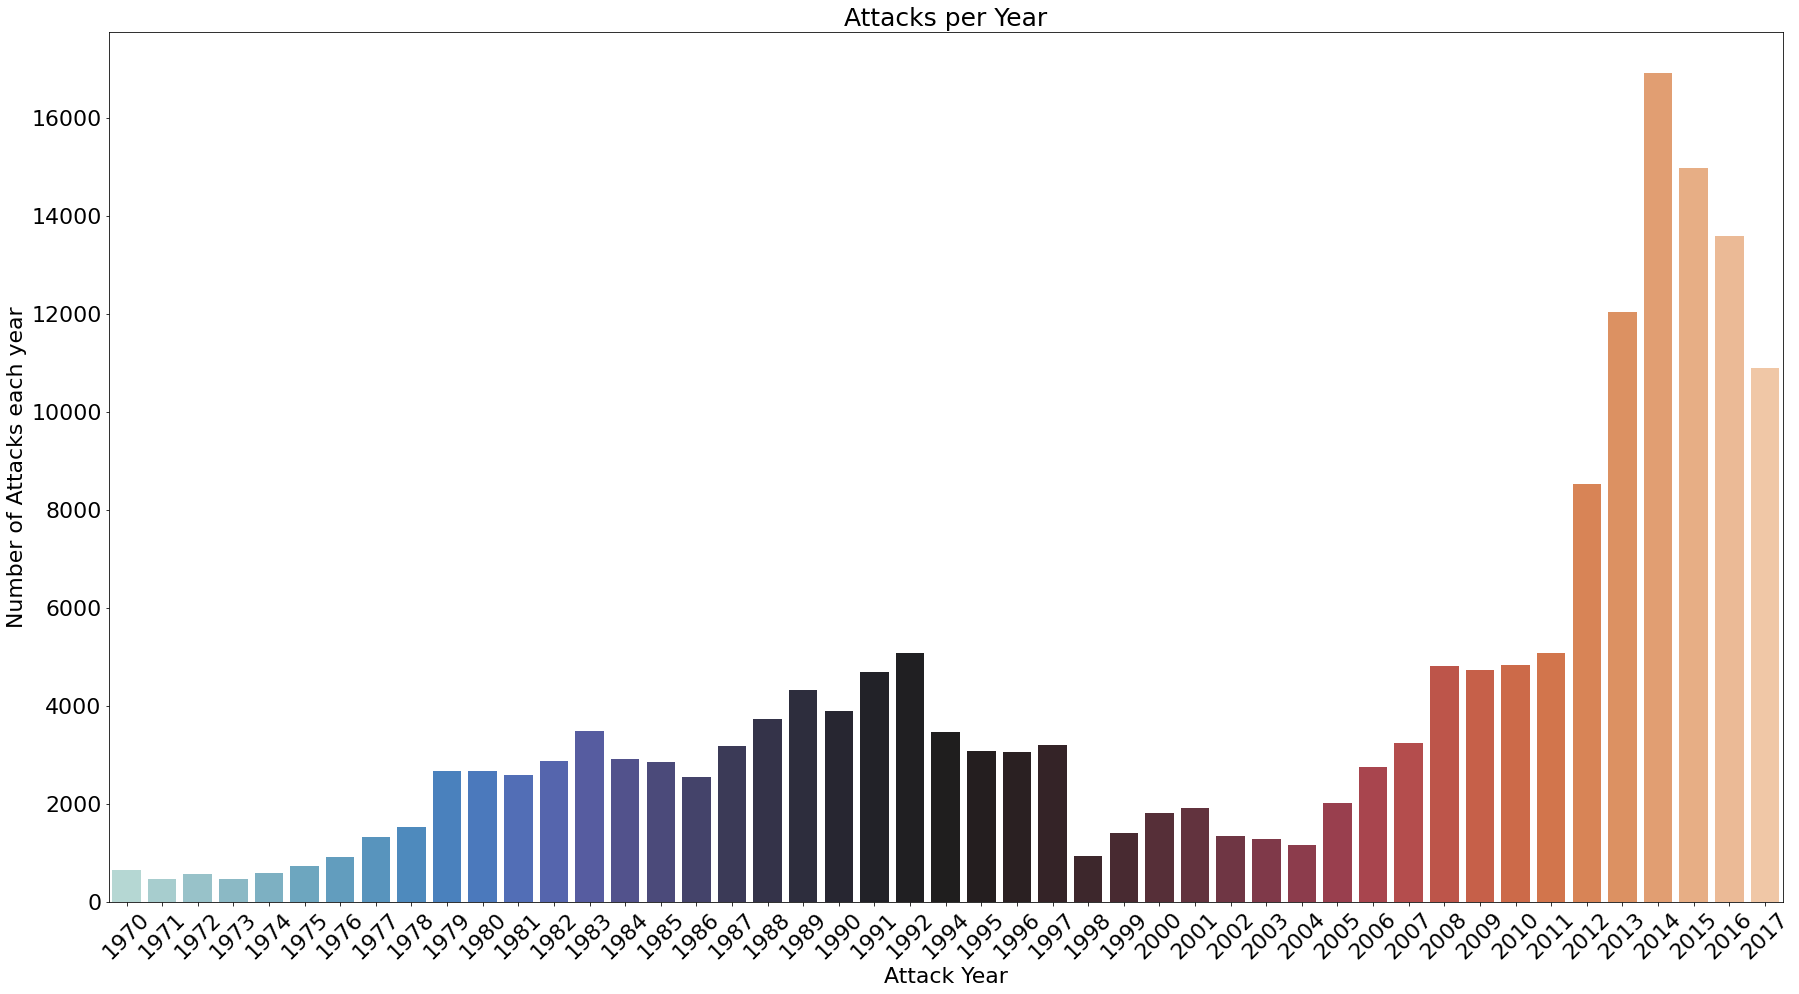

In [82]:
x_year = terror_df2['Year'].unique()
y_count_years = terror_df2['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (30,16))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'icefire')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks per Year')
plt.show()

#### Now, lets look at the terrorist activities by region for each year

This time we will use an area map to visualize the same data. It too shows us that the terror activities have increased in the `MENA` and `HK-H` regions manyfold since the early `2000's`

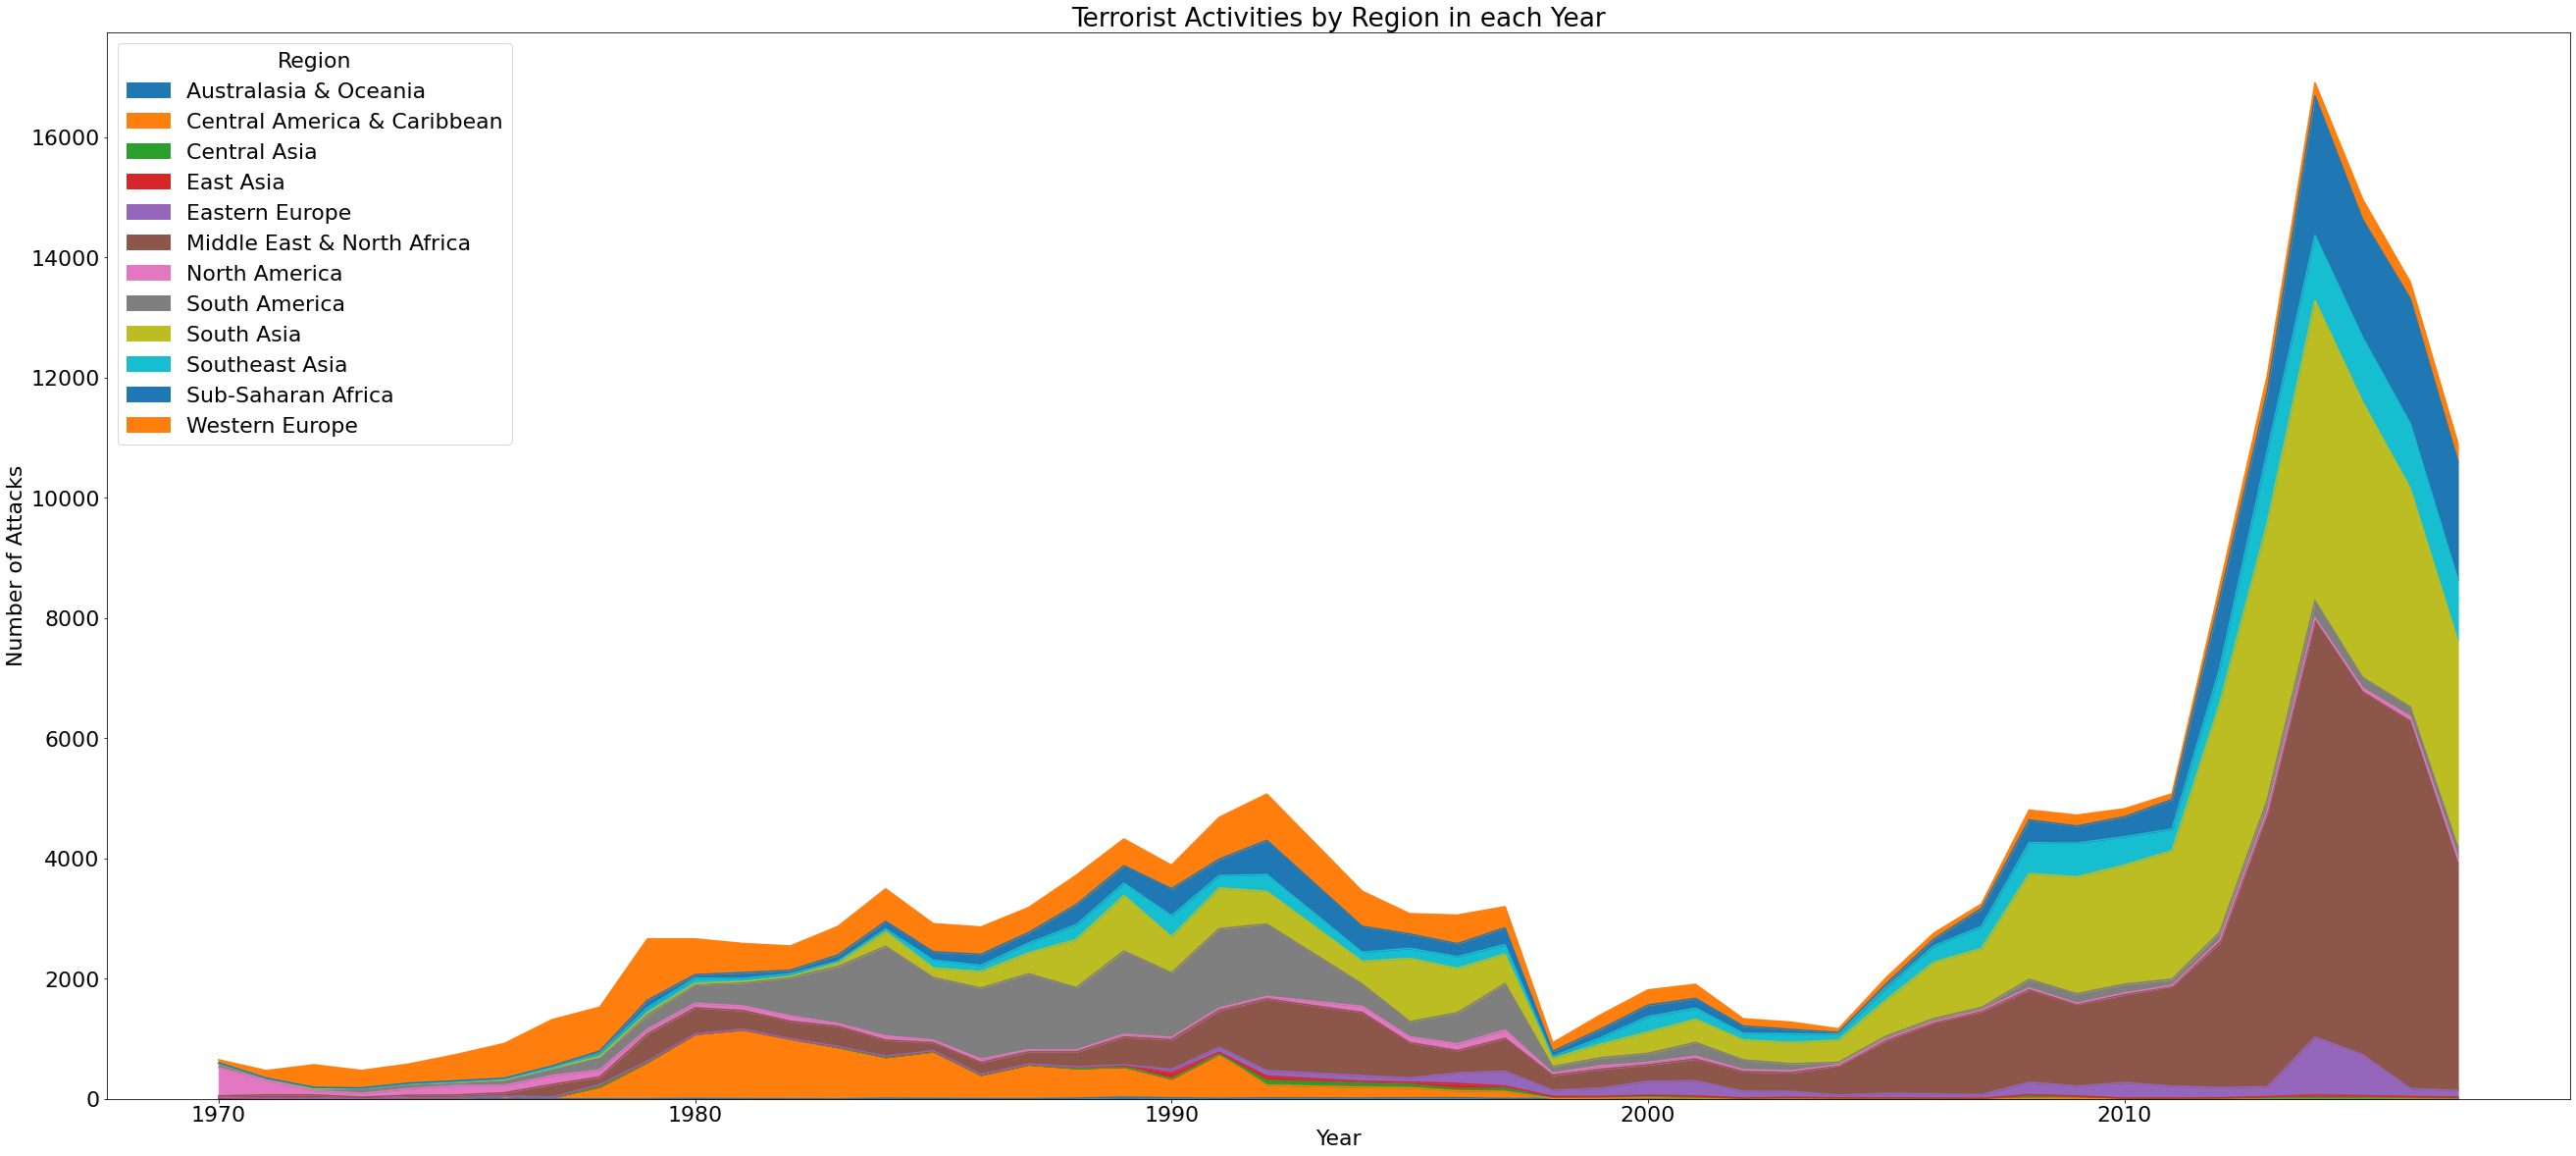

In [85]:
pd.crosstab(terror_df2.Year, terror_df2.Region).plot(kind='area',figsize=(45,20))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Lets now create a Heatmap with the 50 worst terrorist attacks according to casualties


To find the number of casualties, we shall merge two series, namely: `Wounded` and `Killed`

In [86]:
terror_df2['Wounded'] = terror_df2['Wounded'].fillna(0).astype(int)
terror_df2['Killed'] = terror_df2['Killed'].fillna(0).astype(int)
terror_df2['casualities'] = terror_df2['Killed'] + terror_df2['Wounded']

In [87]:
terror1 = terror_df2.sort_values(by='casualities',ascending=False)[:50]

In [88]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [90]:
heat

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,536.0,0.000000,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,1161.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1005.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,702.0,462.0,833.333333,0.0,509.0,0.0,1064.333333,0.0,911.666667,0.0


In [94]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

### Attack Types


In [97]:

attackTypes = terror_df2['AttackType']

x = attackTypes.value_counts().index
y = attackTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Attack types",    
    )
layout = dict(
        title="Attack types",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
fig1.show()